<a href="https://colab.research.google.com/github/jorgefsa1/colab/blob/main/S%C3%A9rie_temporal_com_Facebook_1_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Série temporal com Facebook Prophet - previsão de visualizações diárias de páginas web

## Instalação da biblioteca e importação da base de dados

- Visualizações diárias de uma página web da Wikipedia: https://en.wikipedia.org/wiki/Peyton_Manning

In [61]:
#!pip install --upgrade fbprophet

In [62]:
#!pip3 install prophet


In [63]:
#!pip install --upgrade plotly

In [64]:
#%pip install prophet

In [65]:
#!sudo pip install pystan==2.19.1.1 prophet

In [66]:
#import prophet

In [67]:
from prophet import Prophet
import pandas as pd

In [68]:
dataset = pd.read_csv('/content/page_wikipedia.csv')
dataset

,date,views
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [69]:
dataset.describe()

,views
count,2905.000000
mean,8.138958
std,0.845957
min,5.262690
25%,7.514800
50%,7.997999
75%,8.580168
max,12.846747


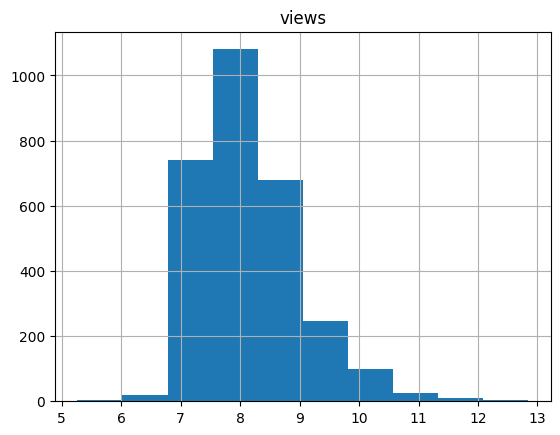

In [70]:
dataset.hist();

In [71]:
dataset = dataset[['date', 'views']].rename(columns = {'date': 'ds', 'views': 'y'})
dataset

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [72]:
dataset = dataset.sort_values(by = 'ds')
dataset

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


## Construção do modelo e previsões

In [73]:
model = Prophet()
model.fit(dataset)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpojpnzgjd/1f95paxw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpojpnzgjd/32s43x7n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85456', 'data', 'file=/tmp/tmpojpnzgjd/1f95paxw.json', 'init=/tmp/tmpojpnzgjd/32s43x7n.json', 'output', 'file=/tmp/tmpojpnzgjd/prophet_modelc29zgvp5/prophet_model-20231211203128.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:31:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:31:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [74]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

In [75]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.041704,8.248068,9.431388,8.041704,8.041704,0.802946,0.802946,0.802946,0.352288,0.352288,0.352288,0.450658,0.450658,0.450658,0.0,0.0,0.0,8.844650
1,2007-12-11,8.040157,7.967940,9.187605,8.040157,8.040157,0.553024,0.553024,0.553024,0.119636,0.119636,0.119636,0.433389,0.433389,0.433389,0.0,0.0,0.0,8.593182
2,2007-12-12,8.038611,7.789537,9.000975,8.038611,8.038611,0.350386,0.350386,0.350386,-0.066669,-0.066669,-0.066669,0.417055,0.417055,0.417055,0.0,0.0,0.0,8.388997
3,2007-12-13,8.037064,7.732928,8.969681,8.037064,8.037064,0.329846,0.329846,0.329846,-0.072254,-0.072254,-0.072254,0.402100,0.402100,0.402100,0.0,0.0,0.0,8.366910
4,2007-12-14,8.035517,7.715151,8.981875,8.035517,8.035517,0.319356,0.319356,0.319356,-0.069575,-0.069575,-0.069575,0.388931,0.388931,0.388931,0.0,0.0,0.0,8.354874


In [76]:
len(dataset), len(forecast)

(2905, 2995)

In [77]:
len(forecast) - len(dataset)

90

In [78]:
forecast.tail(90)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2905,2016-01-21,7.559905,7.971593,9.225206,7.559905,7.559905,0.999855,0.999855,0.999855,-0.072254,-0.072254,-0.072254,1.072109,1.072109,1.072109,0.0,0.0,0.0,8.559760
2906,2016-01-22,7.558883,7.954310,9.185754,7.558883,7.558883,1.016860,1.016860,1.016860,-0.069575,-0.069575,-0.069575,1.086435,1.086435,1.086435,0.0,0.0,0.0,8.575743
2907,2016-01-23,7.557862,7.726280,8.945909,7.557862,7.557862,0.786590,0.786590,0.786590,-0.311713,-0.311713,-0.311713,1.098303,1.098303,1.098303,0.0,0.0,0.0,8.344452
2908,2016-01-24,7.556840,8.047264,9.342337,7.556840,7.556840,1.155604,1.155604,1.155604,0.048287,0.048287,0.048287,1.107318,1.107318,1.107318,0.0,0.0,0.0,8.712445
2909,2016-01-25,7.555819,8.370811,9.607879,7.555819,7.555819,1.465356,1.465356,1.465356,0.352288,0.352288,0.352288,1.113068,1.113068,1.113068,0.0,0.0,0.0,9.021175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,2016-04-15,7.473079,6.329802,7.562086,7.445672,7.497828,-0.560878,-0.560878,-0.560878,-0.069575,-0.069575,-0.069575,-0.491303,-0.491303,-0.491303,0.0,0.0,0.0,6.912201
2991,2016-04-16,7.472058,6.099219,7.335596,7.443809,7.497716,-0.772927,-0.772927,-0.772927,-0.311713,-0.311713,-0.311713,-0.461214,-0.461214,-0.461214,0.0,0.0,0.0,6.699131
2992,2016-04-17,7.471036,6.458845,7.706203,7.441947,7.497137,-0.383237,-0.383237,-0.383237,0.048287,0.048287,0.048287,-0.431524,-0.431524,-0.431524,0.0,0.0,0.0,7.087799
2993,2016-04-18,7.470015,6.822951,8.013604,7.440415,7.497039,-0.050685,-0.050685,-0.050685,0.352288,0.352288,0.352288,-0.402973,-0.402973,-0.402973,0.0,0.0,0.0,7.419330


## Gráfico das previsões

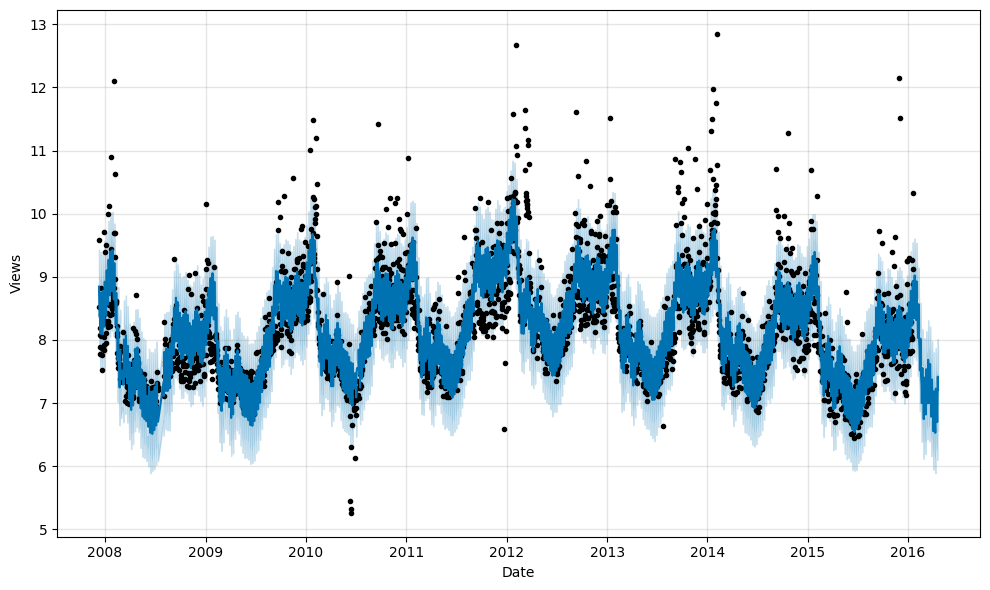

In [79]:
model.plot(forecast, xlabel = 'Date', ylabel = 'Views');

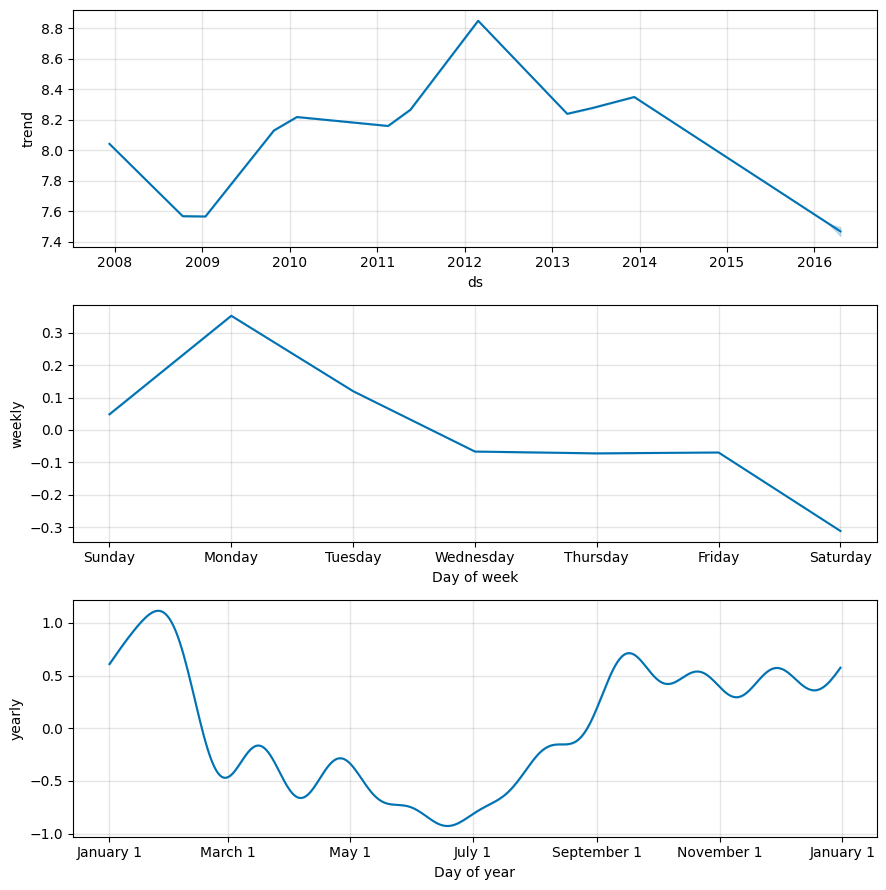

In [80]:
model.plot_components(forecast);

In [81]:
from prophet.plot import plot_plotly, plot_components_plotly

In [82]:
plot_plotly(model, forecast)

In [83]:
plot_components_plotly(model, forecast)